# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "../data/Mouse_metadata.csv"
study_results_path = "../data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on=["Mouse ID"])
combined_data_sort = combined_data.sort_values(["Timepoint"], ascending=True)
combined_data_sort = combined_data_sort.reset_index(drop=True)

# Display the data table for preview
combined_data_sort.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,w584,0,45.0,0,Infubinol,Male,3,29
2,p136,0,45.0,0,Zoniferol,Female,5,28
3,a411,0,45.0,0,Ramicane,Male,3,22
4,b447,0,45.0,0,Ceftamin,Male,2,30


In [2]:
# Checking the number of mice.
mouse_count = len(combined_data["Mouse ID"].unique())
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data = combined_data_sort.loc[combined_data_sort.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_data

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data_sort[combined_data_sort['Mouse ID'].isin(duplicate_data)==False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,w584,0,45.0,0,Infubinol,Male,3,29
2,p136,0,45.0,0,Zoniferol,Female,5,28
3,a411,0,45.0,0,Ramicane,Male,3,22
4,b447,0,45.0,0,Ceftamin,Male,2,30


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count = len(clean_df["Mouse ID"].unique())
mouse_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_regimen_mean = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
drug_regimen_median = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
drug_regimen_var = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
drug_regimen_std = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
drug_regimen_sem = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
drug_regimen_summary =pd.DataFrame({"Mean Tumor Volume": drug_regimen_mean, "Median Tumor Volume": drug_regimen_median,
                                   "Tumor Volume Variance": drug_regimen_var, "Tumor Volume Std. Dev.": drug_regimen_std, 
                                   "Tumor Volume Std. Err.": drug_regimen_sem})
drug_regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
drug_regimen_aggregate = clean_df.groupby("Drug Regimen").aggregate({"Tumor Volume (mm3)":['mean', 'median', 'var', 'std', 'sem']})
drug_regimen_aggregate

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
clean_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,w584,0,45.000000,0,Infubinol,Male,3,29
2,p136,0,45.000000,0,Zoniferol,Female,5,28
3,a411,0,45.000000,0,Ramicane,Male,3,22
4,b447,0,45.000000,0,Ceftamin,Male,2,30
...,...,...,...,...,...,...,...,...
1888,k403,45,22.050126,1,Ramicane,Male,21,16
1889,z581,45,62.754451,3,Infubinol,Female,24,25
1890,v923,45,40.658124,2,Capomulin,Female,19,21
1891,j119,45,38.125164,1,Capomulin,Female,7,23


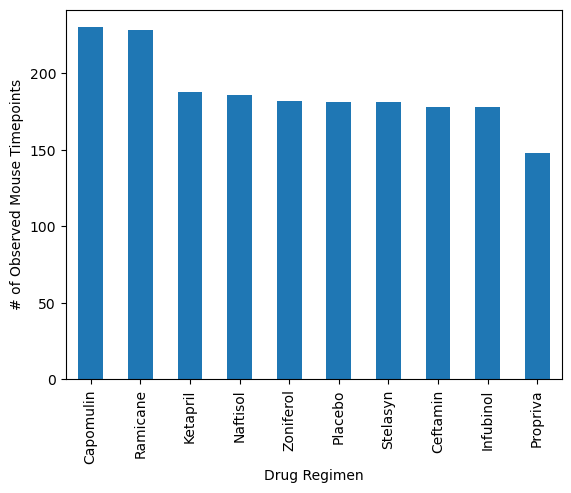

In [10]:
drug_reg = clean_df.groupby(["Drug Regimen"])["Timepoint"].count()
drug_reg
plot_bar = drug_reg.sort_values(ascending=False).plot.bar(rot=90, ylabel="# of Observed Mouse Timepoints")

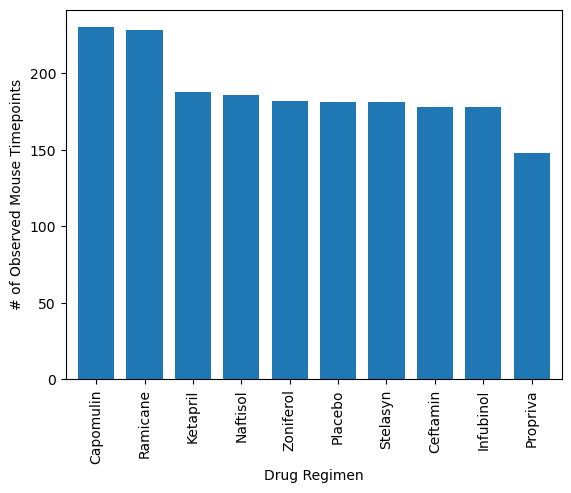

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_reg2 = clean_df.groupby("Drug Regimen")
timepoints = drug_reg2["Timepoint"].count()
timepoints_bar = timepoints.sort_values(ascending=False).plot(kind="bar", width = .75)
timepoints_bar.set_ylabel("# of Observed Mouse Timepoints")
plt.show()


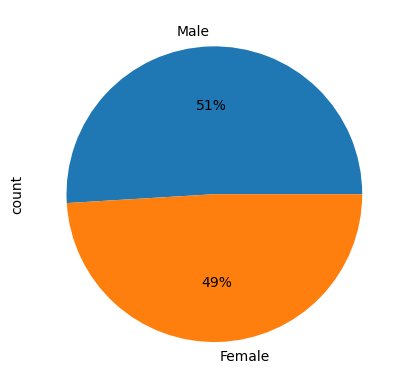

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = clean_df["Sex"].value_counts()
sex
sex_pie = sex.plot(kind="pie", y="Sex", autopct='%1.0f%%')

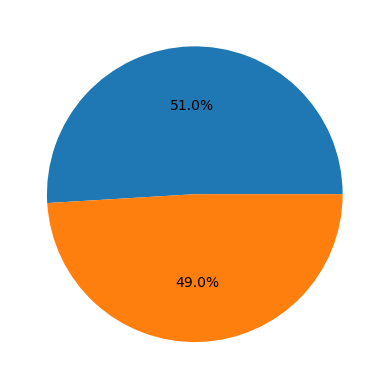

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_df.groupby(["Mouse ID"])["Timepoint"].max()
max_timepoint =max_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_data = max_timepoint.merge(clean_df,on=["Mouse ID","Timepoint"],how ="left")
merge_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
treatment_list

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [36]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]

for drug in treatment_list:
    final_tumor_vol = merge_data.loc[merge_data["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    tumor_vol_data.append(final_tumor_vol)
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


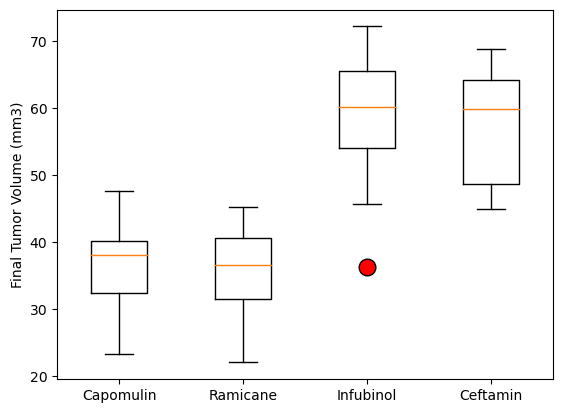

In [67]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot(tumor_vol_data, labels = treatment_list,flierprops=orange_out)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

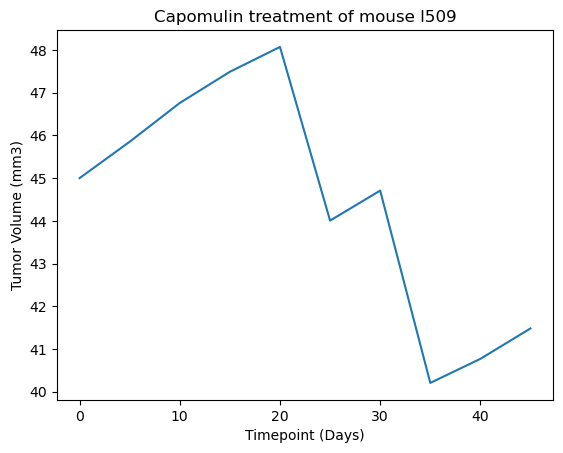

In [37]:
# Generat a line plot of tumor volume vs. time point for a single mouse treated with Copomulin
mouse_l509 = clean_df[clean_df["Mouse ID"] == "l509"]
x_axis = mouse_l509["Timepoint"]
y_axis = mouse_l509["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [38]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_df[clean_df["Drug Regimen"] == "Capomulin"]
capomulin_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
149,w914,0,45.000000,0,Capomulin,Male,24,21
151,v923,0,45.000000,0,Capomulin,Female,19,21
153,j119,0,45.000000,0,Capomulin,Female,7,23
158,u364,0,45.000000,0,Capomulin,Male,18,17
...,...,...,...,...,...,...,...,...
1867,r944,45,41.581521,2,Capomulin,Male,12,25
1877,u364,45,31.023923,3,Capomulin,Male,18,17
1890,v923,45,40.658124,2,Capomulin,Female,19,21
1891,j119,45,38.125164,1,Capomulin,Female,7,23


In [39]:
avg_tumor_vol = capomulin_data.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
avg_tumor_vol
weight = capomulin_data.groupby(["Mouse ID"])["Weight (g)"].unique()
weight
weight = weight.astype(float)
avg_tumor_summary = pd.DataFrame({"Weight (g)": weight, "Average Tumor Volume": avg_tumor_vol})
avg_tumor_summary

,Weight (g),Average Tumor Volume
Mouse ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344
i557,24.0,44.805810
i738,20.0,39.141053
j119,23.0,44.465236
j246,21.0,43.216925


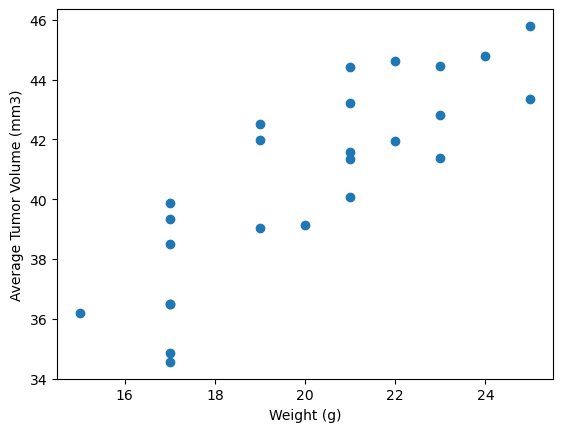

In [40]:
x_axis = avg_tumor_summary["Weight (g)"]
y_axis = avg_tumor_summary["Average Tumor Volume"]
plt.scatter(x_axis, y_axis)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [41]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
print(f"The correlation between both factors is {(st.pearsonr(weight,avg_tumor_vol)[0])}.")
plt.show()

The correlation between both factors is 0.841936342469472.


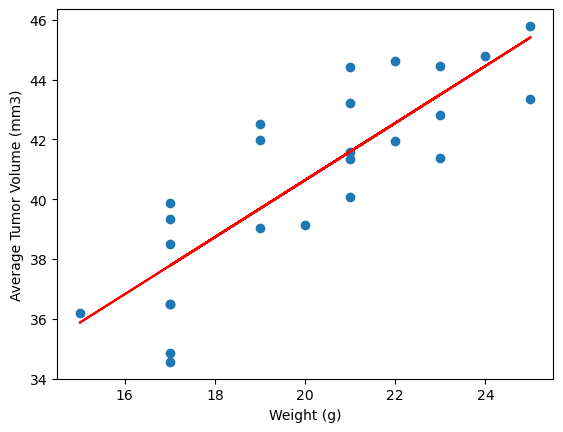

In [42]:
x_values = avg_tumor_summary["Weight (g)"]
y_values= avg_tumor_summary["Average Tumor Volume"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()